IE 7275

Data Mining

Dr. Xeumin Jin

Edward Brown

08/01/2024

Final Project - Stock Price Prediction

Step 1 - Setting Up the Environment for Data Analysis, Visualization, and Machine Learning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

Step 2 - Loading our datasets

In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler

# Load Kaggle datasets
companies = pd.read_csv('sp500_companies.csv')
index = pd.read_csv('sp500_index.csv')
stocks = pd.read_csv('sp500_stocks.csv')

# Load historical data using yfinance
sp500 = yf.download('^GSPC', start='1994-01-01', end='2024-01-01')

# Load Federal funds rate dataset
federal_funds = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=DFF', parse_dates=['DATE'])
federal_funds.rename(columns={'DATE': 'Date', 'DFF': 'Federal_Funds_Rate'}, inplace=True)

# Load CPI dataset
cpi = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL', parse_dates=['DATE'])
cpi.rename(columns={'DATE': 'Date', 'CPIAUCSL': 'CPI'}, inplace=True)

# Merge datasets
sp500.reset_index(inplace=True)
data = pd.merge(sp500, federal_funds, on='Date', how='inner')
data = pd.merge(data, cpi, on='Date', how='inner')




[*********************100%%**********************]  1 of 1 completed


Step 3 - Data Cleaning and Preprocessing

In [ ]:
# Data Cleaning and Preprocessing
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Impute missing values with mean for numerical features
data.fillna(data.mean(), inplace=True)
print("Missing values after imputation:\n", data.isnull().sum())

# Double-check for any remaining NaN values
nan_counts = data.isna().sum()
print("NaN values remaining in each column after processing:\n", nan_counts)

# Handling outliers (if necessary)
# Clipping the data to a specified range to handle outliers
data['Adj Close'] = data['Adj Close'].clip(lower=data['Adj Close'].quantile(0.01), upper=data['Adj Close'].quantile(0.99))

# Normalization/Scaling
#features_to_scale = ['Federal_Funds_Rate', 'CPI']
#scaler = StandardScaler()
#data[features_to_scale] = scaler.fit_transform(data[features_to_scale])



Missing values in each column:
 Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Federal_Funds_Rate    0
CPI                   0
dtype: int64
Missing values after imputation:
 Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Federal_Funds_Rate    0
CPI                   0
dtype: int64
NaN values remaining in each column after processing:
 Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Federal_Funds_Rate    0
CPI                   0
dtype: int64


In [ ]:
# Display the first few rows after preprocessing
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Federal_Funds_Rate,CPI
0,1994-02-01,481.600006,481.640015,479.179993,479.619995,479.619995,322510000,3.25,146.7
1,1994-03-01,467.190002,467.429993,462.019989,464.440002,464.440002,304450000,3.31,147.1
2,1994-06-01,456.500000,458.290009,453.989990,457.630005,458.677806,279910000,4.33,147.9
3,1994-07-01,444.269989,446.450012,443.579987,446.200012,458.677806,199030000,3.82,148.4
4,1994-08-01,458.279999,461.010010,458.079987,461.010010,461.010010,258180000,4.34,149.0


In [ ]:
# Get a better idea of how our data looks
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Federal_Funds_Rate,CPI
count,232,232.000000,232.000000,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000
mean,2009-02-24 17:41:22.758620672,1771.157970,1783.315692,1759.939869,1773.706855,1773.449816,2.872275e+09,2.520690,213.776000
min,1994-02-01 00:00:00,444.269989,446.450012,443.579987,446.200012,458.677806,1.990300e+08,0.050000,146.700000
25%,2001-07-16 18:00:00,1101.035004,1109.227478,1097.990021,1107.590027,1107.590027,1.203900e+09,0.167500,177.475000
50%,2009-05-16 12:00:00,1327.525024,1339.429993,1319.285034,1331.739990,1331.739990,3.385755e+09,1.855000,216.185000
75%,2016-09-16 06:00:00,2171.785034,2174.742554,2159.370056,2170.845093,2170.845093,4.208042e+09,5.122500,241.388500
max,2023-12-01 00:00:00,4610.620117,4652.939941,4595.060059,4613.669922,4567.371099,6.862360e+09,7.800000,308.742000
std,NaN,1092.951588,1099.243197,1086.796805,1093.274147,1092.228770,1.726818e+09,2.308359,42.223949


In [ ]:
# learn more about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                232 non-null    datetime64[ns]
 1   Open                232 non-null    float64       
 2   High                232 non-null    float64       
 3   Low                 232 non-null    float64       
 4   Close               232 non-null    float64       
 5   Adj Close           232 non-null    float64       
 6   Volume              232 non-null    int64         
 7   Federal_Funds_Rate  232 non-null    float64       
 8   CPI                 232 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 16.4 KB


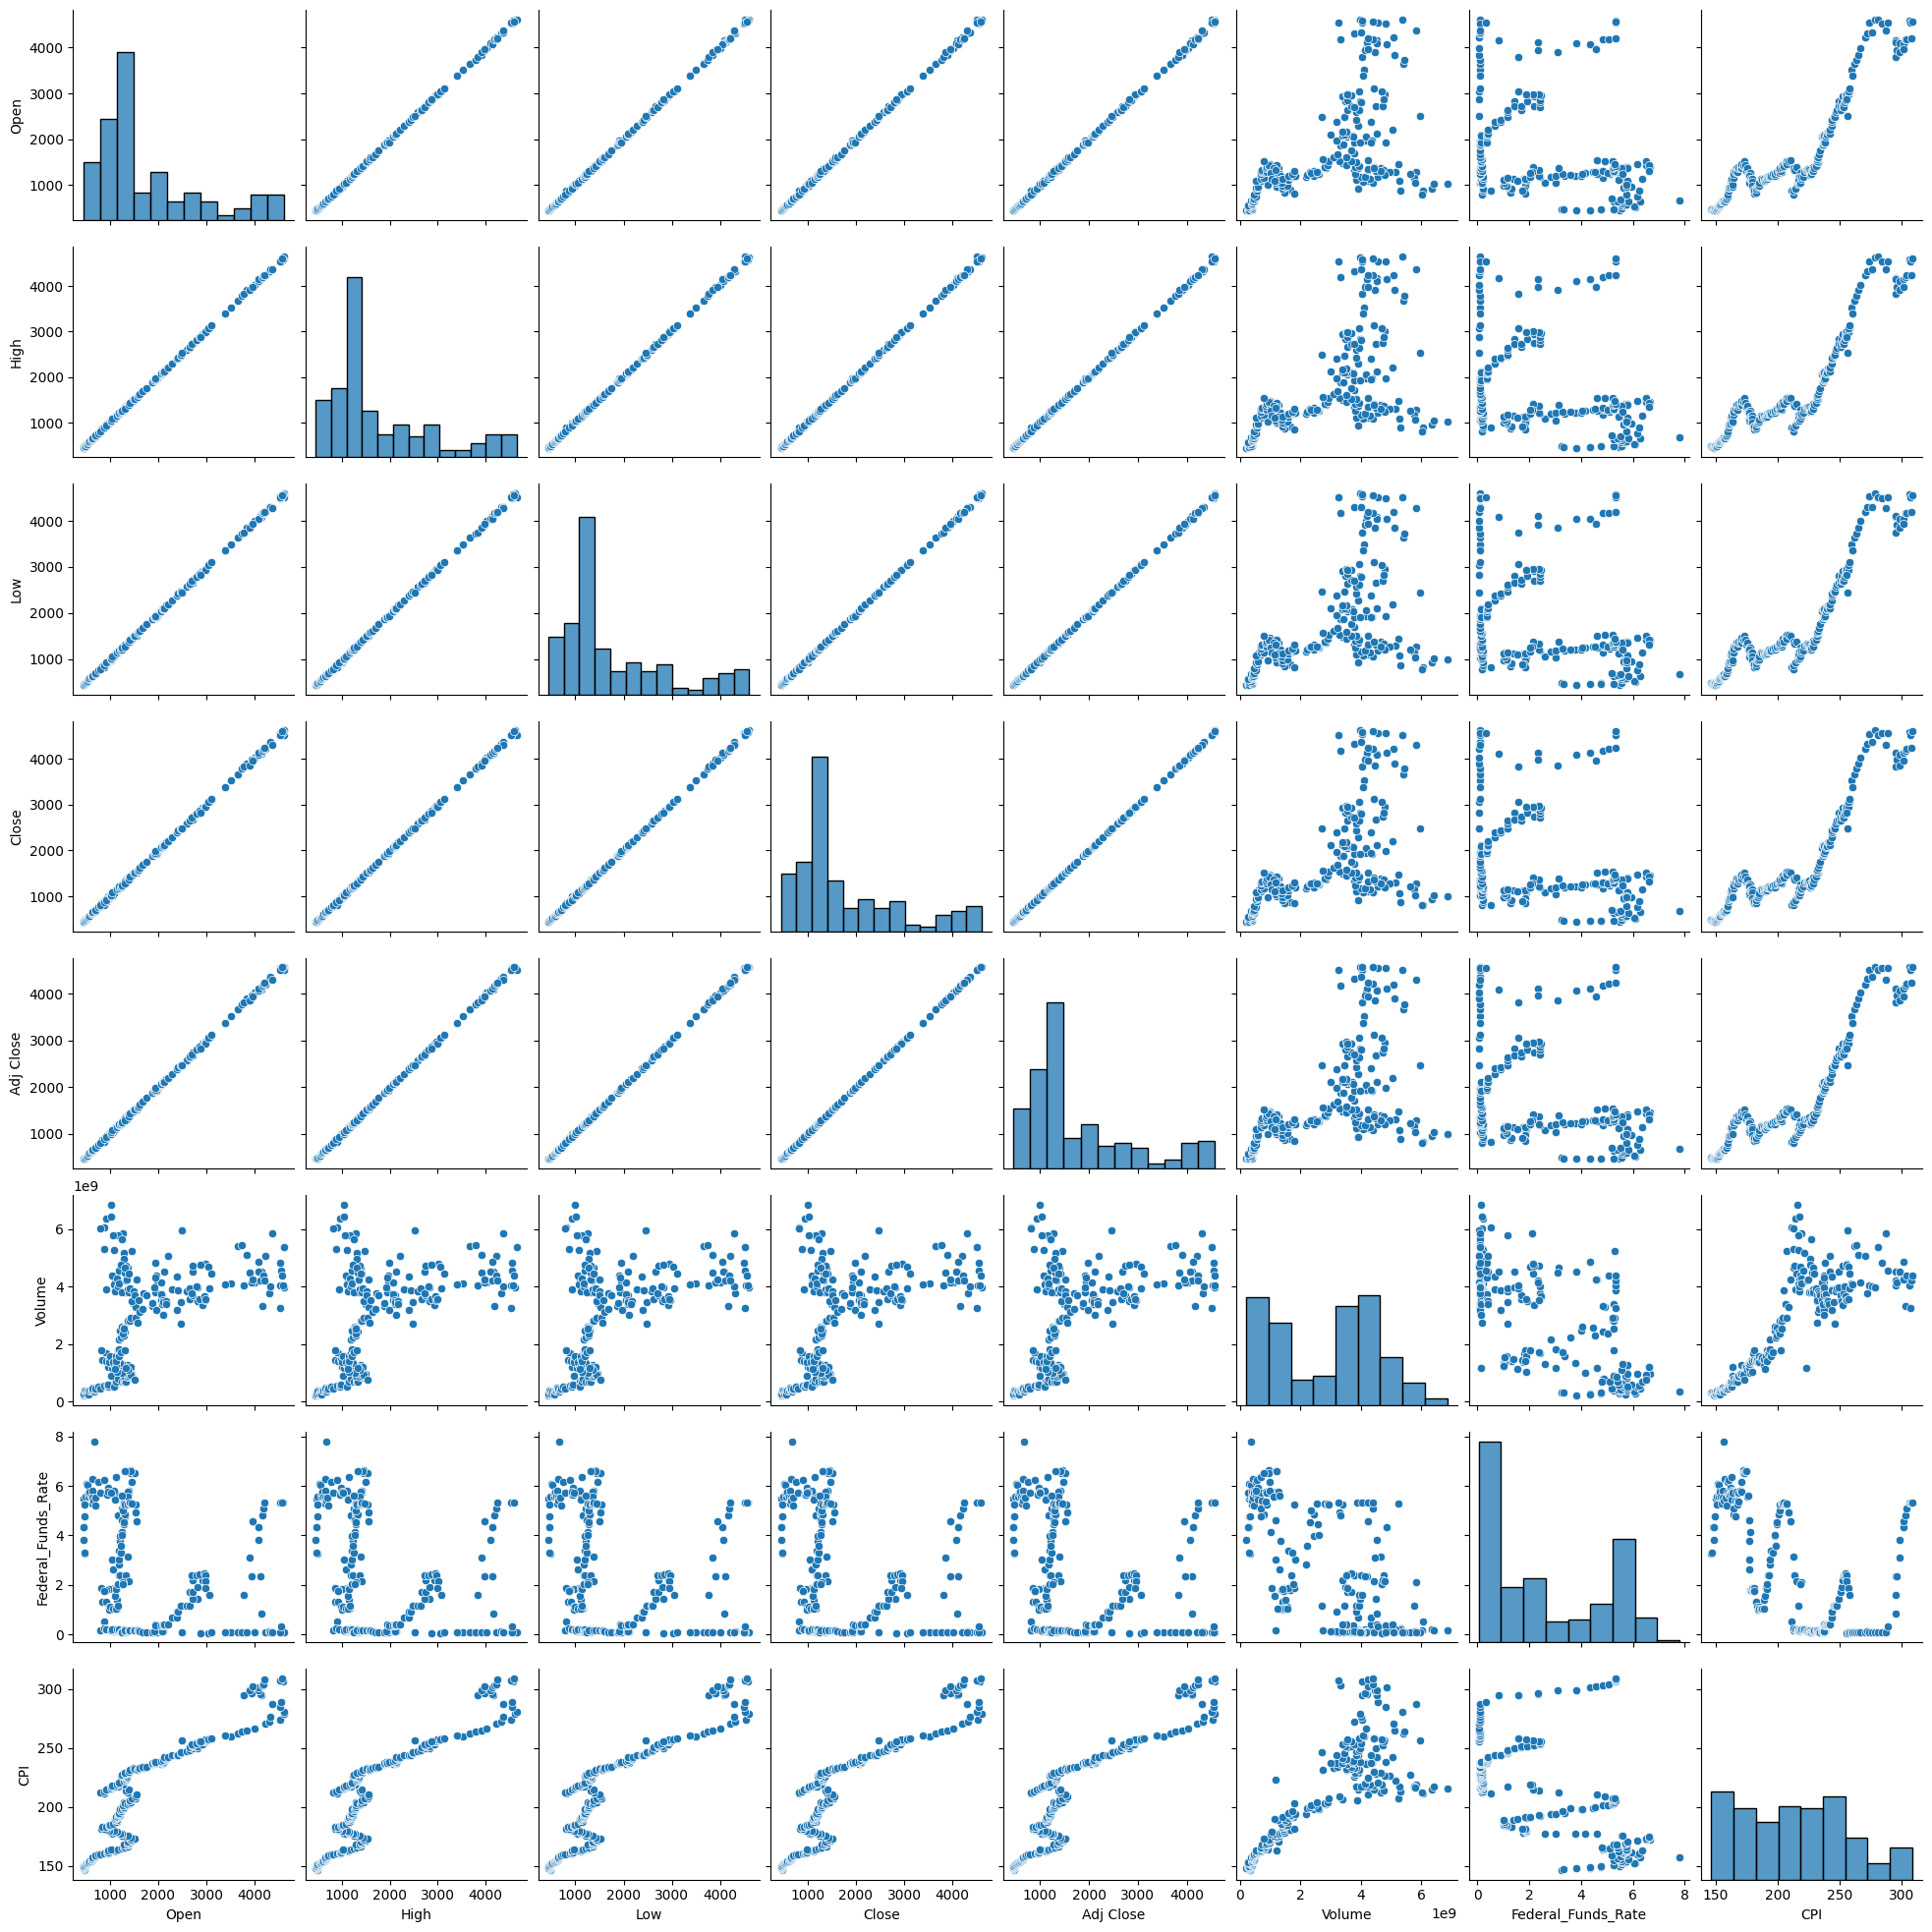

In [ ]:
# Exploratory Data Analysis

# Pairplot
sns.pairplot(data)
plt.show()

I decided to utilize pair plots for my intial visualization to get a better idea of the relationships my data has. I had expected there to be a strong correlation between between closing price and federal funds rate. However, we can clearly see the strongest correlation is between the features involving price such as open, close, high, low, etc.

This caused me to reevaluate the way I was looking at the data and influenced my model heavily.

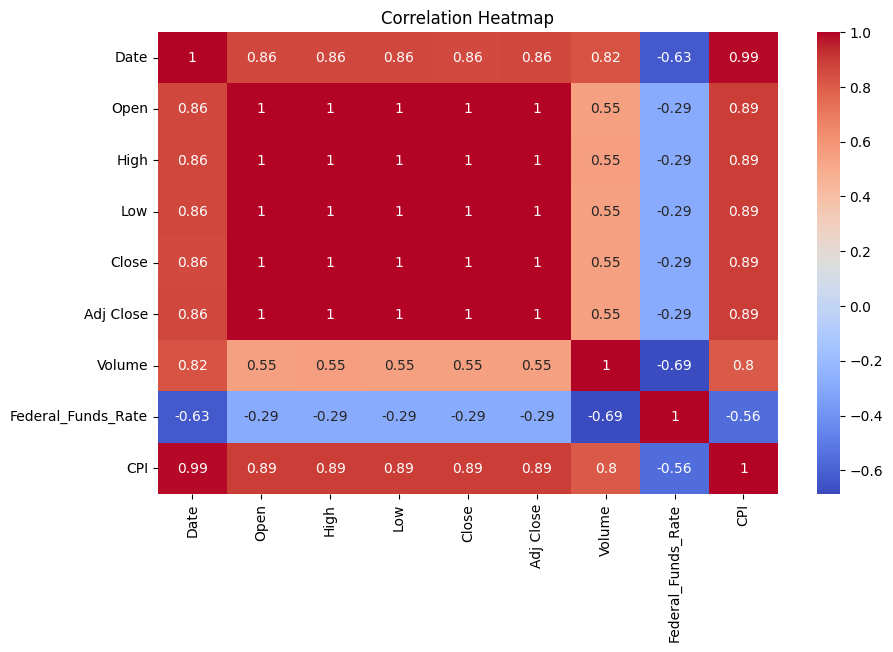

In [ ]:
# Exploratory Data Analysis

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows us the numerical values of our correlations, It shows the same relationships we observed in our pairplots.

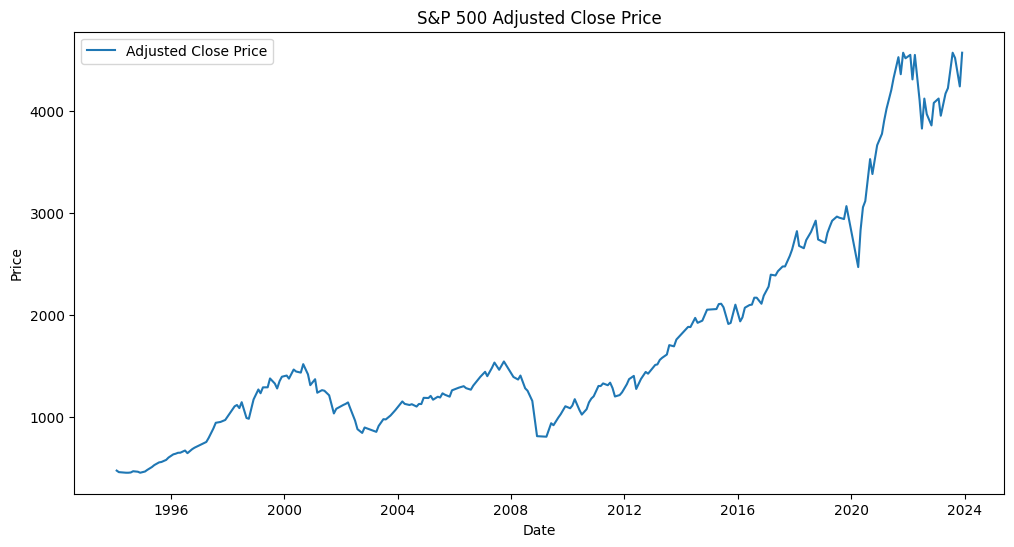

In [ ]:
# Exploratory Data Analysis

# Time series plot of adjusted closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close Price')
plt.title('S&P 500 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This time series plot shows us the adjusted closing price of the S&P 500 over time. This visualization shows us the general trend of the data.

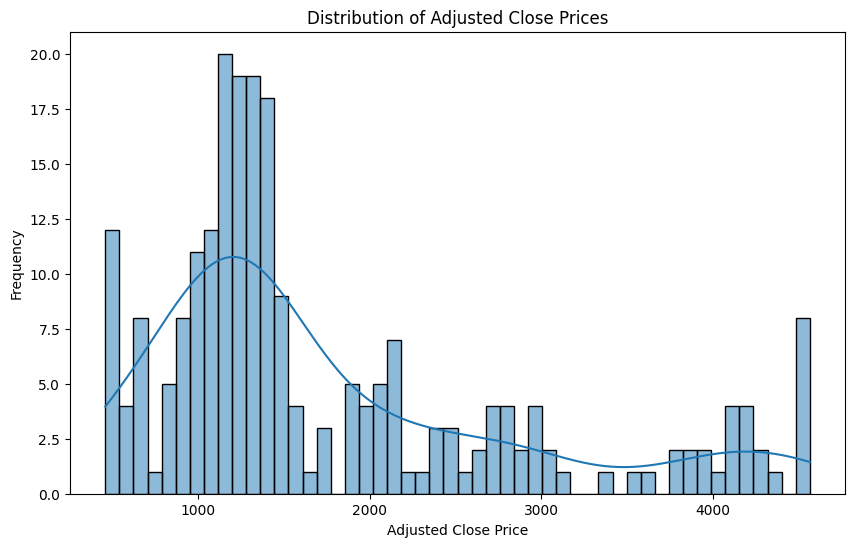

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Adjusted Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Adj Close'], bins=50, kde=True)
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.show()


This distribution plots shows us the distribution of adjusted closes. We can see that the data is skewed to the 1000-2000 range. If we compare this distribution plot to the time series visualization directly above, we can see that the S&P 500 closed between 1000-2000 for around 15 years.

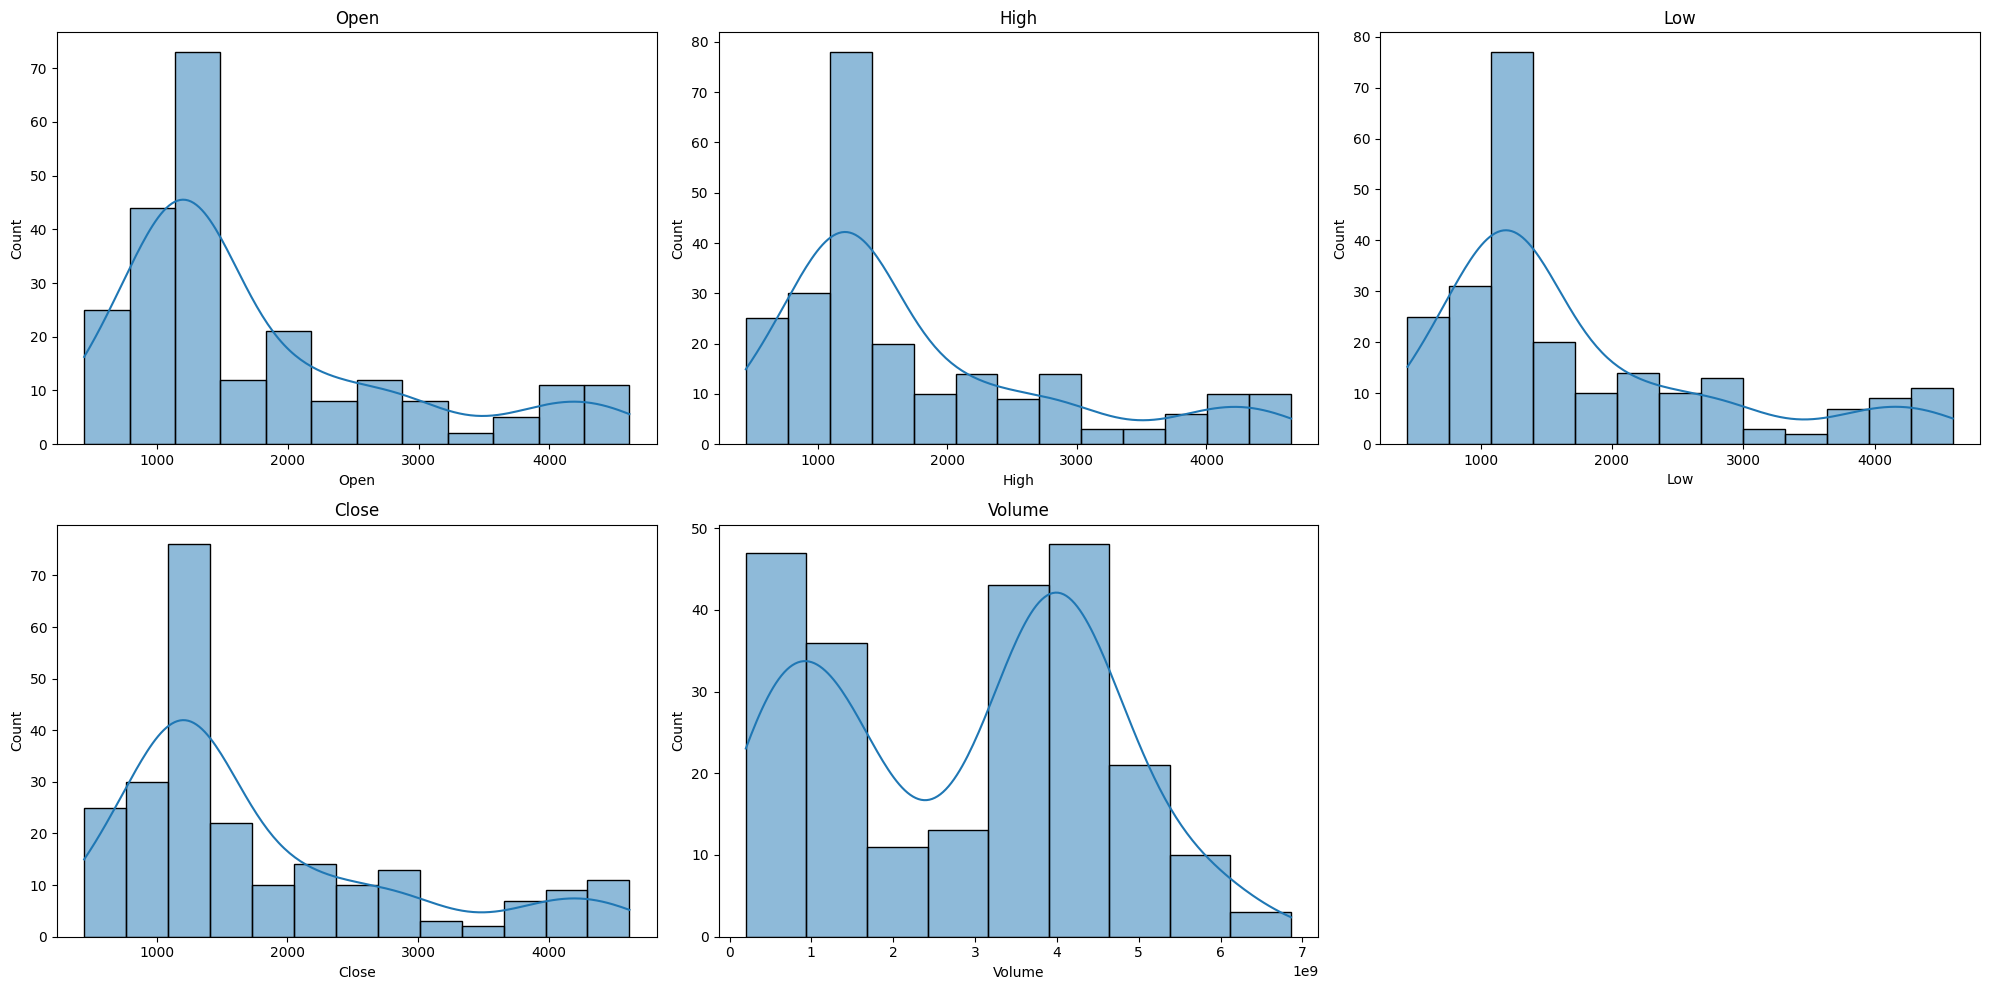

In [ ]:
# Eploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

# Inspecting the distribution of important features

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


I was originally using the distplot functionality of Seaborn but I kept getting deprication warnings, so I researched and found the similiar histplot. I utilized this to inspect the distributions of our important features. Again, we see the same skew we observed in adjusted close prices for most of the features.

<ipython-input-14-709538607975>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


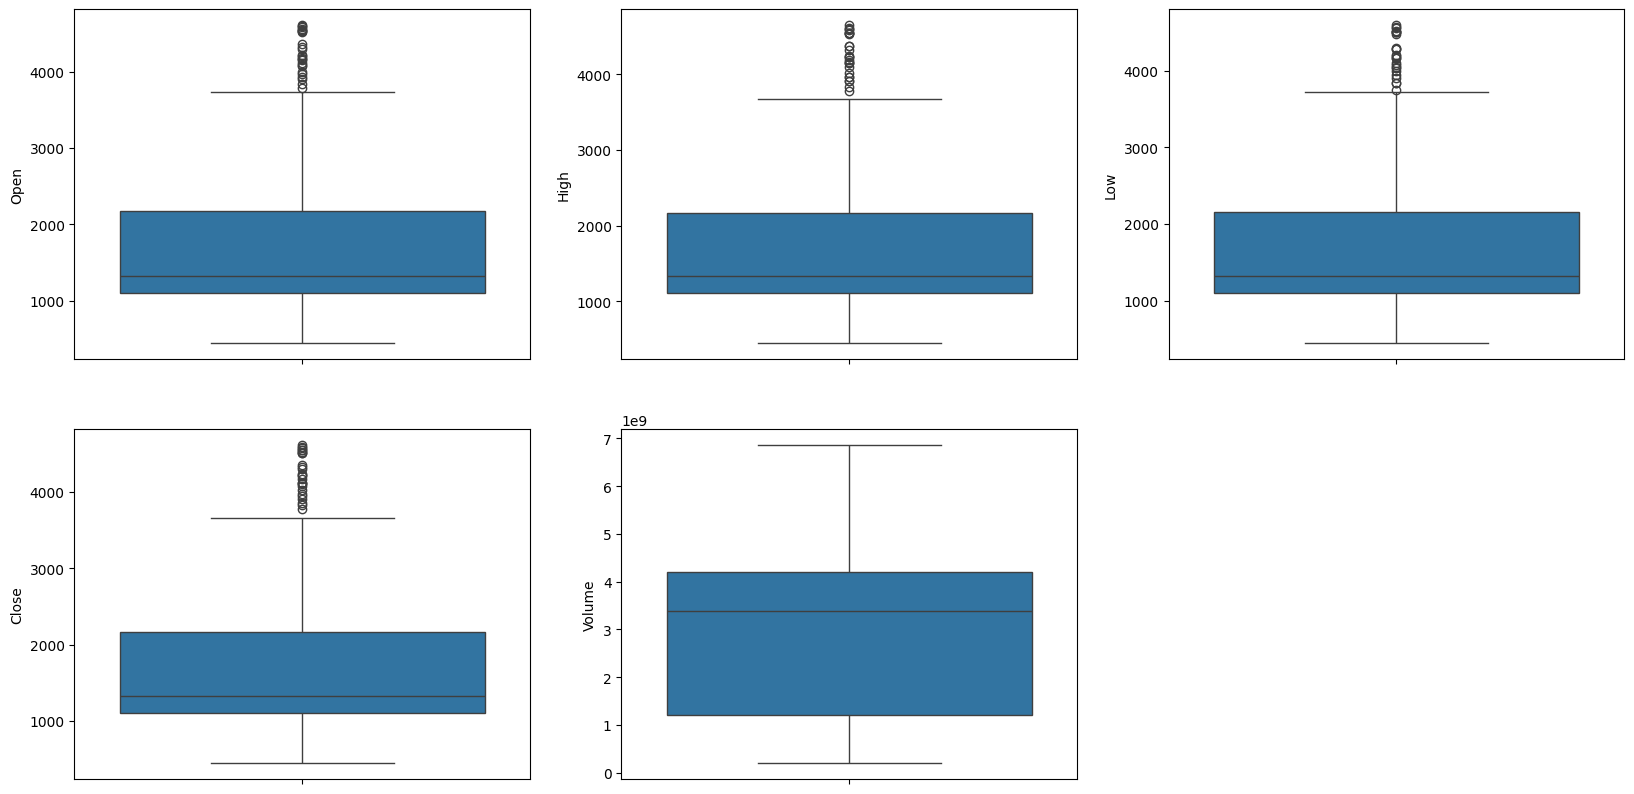

In [ ]:
# Exploratory Data Analysis

# Visualizing Important features via boxplots

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[col])
plt.show()

These box plots provide us with an additional visualization that shows us what the majority of our data looks like. These box plots also show us our interquartile range, and our outliers.

In [ ]:
# Feature Engineering

# Adding a 30-day moving average for the S&P 500
data['SMA_30'] = data['Adj Close'].rolling(window=30).mean()

# Adding a volatility feature (e.g., standard deviation of the last 30 days)
data['Volatility'] = data['Adj Close'].rolling(window=30).std()

# Handle potential NaNs introduced by feature engineering
# I had to implement this in this step because I was getting an error during linear regression due to NaN values
data.dropna(subset=['SMA_30', 'Volatility'], inplace=True)  # Drop rows with NaNs in these columns

# Selecting relevant features
features = ['Federal_Funds_Rate', 'CPI', 'SMA_30', 'Volatility']
X = data[features]
y = data['Adj Close']

# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inspect the dataframe

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Federal_Funds_Rate,CPI,SMA_30,Volatility
29,1997-12-01,955.400024,974.770020,955.400024,974.770020,974.770020,590300000,5.92,161.8,622.586120,160.626782
30,1998-04-01,1101.750000,1109.189941,1095.290039,1108.150024,1108.150024,677310000,5.72,162.2,643.537121,181.030821
31,1998-05-01,1111.750000,1121.020020,1111.750000,1121.000000,1121.000000,581970000,5.46,162.6,665.422454,197.564357
32,1998-06-01,1090.819946,1097.849976,1084.219971,1090.979980,1090.979980,537660000,5.79,162.8,686.499193,208.189864
33,1998-07-01,1133.839966,1148.560059,1133.839966,1148.560059,1148.560059,701600000,6.35,163.2,709.495268,219.927938


I chose to utilize the Fed Funds rate, CPI, a 30 day moving average, and volatility as the features I wanted to base my model upon. My logic at the time was that asset prices are largely dependant on the credit cycle, and the credit cycle is determined by the Federal Reserve.

Model Building

Linear Regression - Mean Squared Error: 72767.28976243876, R² Score: 0.9323339873294002


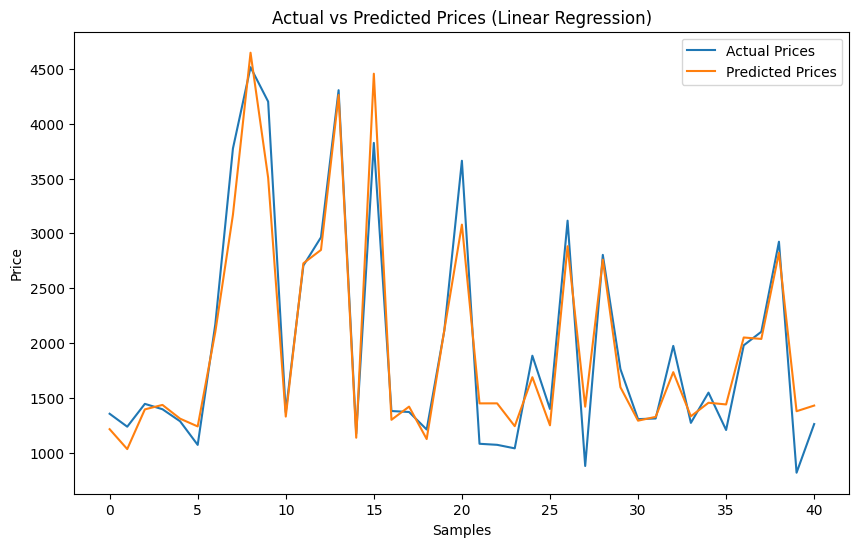

Random Forest - Mean Squared Error: 11262.229641395727, R² Score: 0.9895272975522135


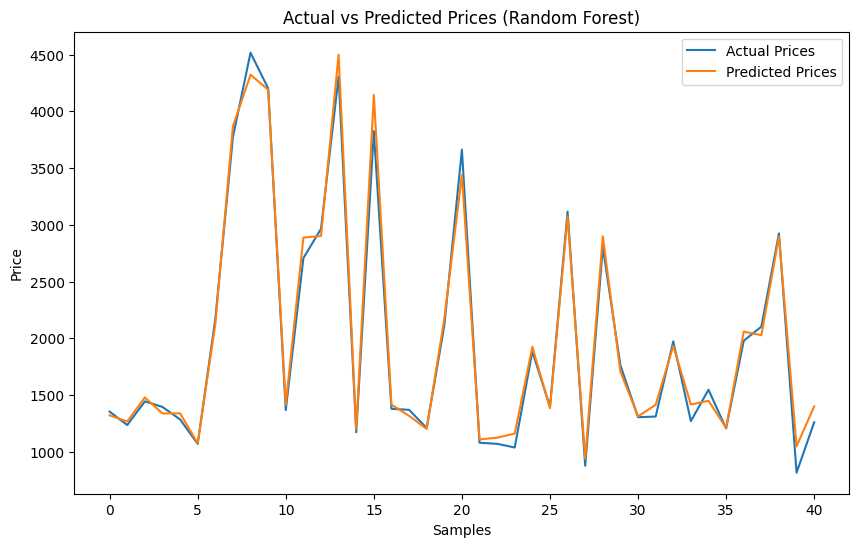

SVR - Mean Squared Error: 1342265.479206256, R² Score: -0.24816731830738004


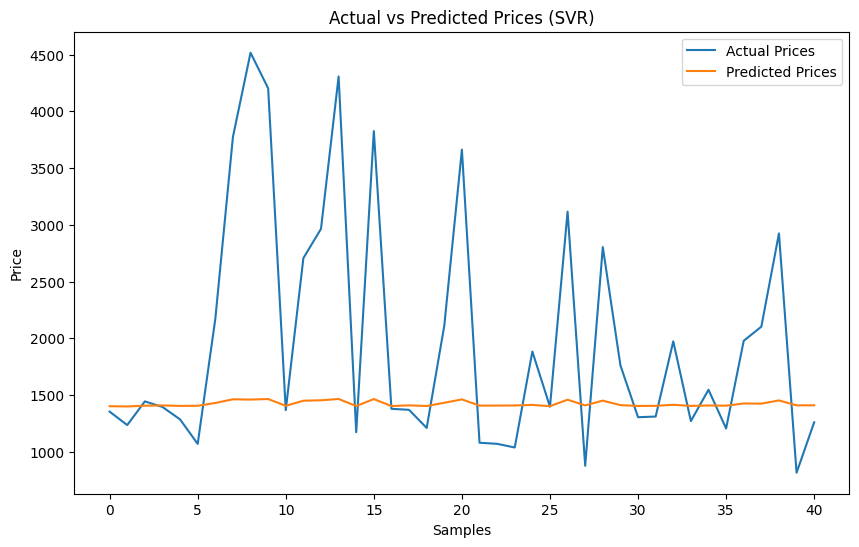

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions and evaluation
models = {'Linear Regression': lr_model, 'Random Forest': rf_model, 'SVR': svr_model}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}, R² Score: {r2}')

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Prices')
    plt.plot(y_pred, label='Predicted Prices')
    plt.legend()
    plt.title(f'Actual vs Predicted Prices ({model_name})')
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.show()


I followed the example given in the project template and used 3 models, in order to see what was the most precise and accurate. It appears that the most accurate models were linear regression and the random forest. The performance of the SVR model was not good by any means. Even the models that did perform decently needed to be more accurate to be usable.

In [ ]:
# Summary of findings
print("Summary of Findings:")
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}, R² Score: {r2}')


Summary of Findings:
Linear Regression - Mean Squared Error: 72767.28976243876, R² Score: 0.9323339873294002
Random Forest - Mean Squared Error: 11262.229641395727, R² Score: 0.9895272975522135
SVR - Mean Squared Error: 1342265.479206256, R² Score: -0.24816731830738004


The linear regression model and the random forest model have decent R2 scores, however their mean squared errors are both too high for a business use case.

Model Refinement

For our model to be useful for a business use case, it would be best for it to provide more than just a prediction, but to predict prices for the next day based on previous data. Moreover, the model should also evaluate itself for accuracy on these predictions.

In [ ]:
# Verify we are utilizing the actual closing price
data = sp500[["Date", "Adj Close"]]
data = data.rename(columns = {'Adj Close': 'Actual_Close'})

# Setup our target. This identifies if the price went up or down
# When the price goes up the target is 1, down is 0
data["Target"] = sp500["Adj Close"].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])

# Shift stock prices forward one day, so we're predicting tomorrow's stock prices from today's prices.
# This is integral to make actionable future predictions
sp500_prev = sp500.copy()
sp500_prev = sp500_prev.shift(1)

# Form training data using our predictors
predictors = ["Adj Close", "Volume", "Open", "High", "Low"]
data = data.join(sp500_prev[predictors]).iloc[1:]

# Display the first few rows of our dataset
data.head(5)


,Date,Actual_Close,Target,Adj Close,Volume,Open,High,Low
1,1994-01-04,466.890015,1.0,465.440002,270140000.0,466.510010,466.940002,464.359985
2,1994-01-05,467.549988,1.0,466.890015,326600000.0,465.440002,466.890015,464.440002
3,1994-01-06,467.119995,0.0,467.549988,400030000.0,466.890015,467.820007,465.920013
4,1994-01-07,469.899994,1.0,467.119995,365960000.0,467.549988,469.000000,467.019989
5,1994-01-10,475.269989,1.0,469.899994,324920000.0,467.089996,470.260010,467.029999


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest model with parameters to prevent overfitting.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

# Create training and testing sets
train = data.iloc[:-100]
test = data.iloc[-100:]

# Fit the model on the training data
model.fit(train[predictors], train["Target"])

# Make predictions on the test set
predictions = model.predict(test[predictors])

# Output the predictions
print("Predictions:", predictions)

# Output the number of predictions made
print("Number of predictions made:", len(predictions))


Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Number of predictions made: 100


Now we have our predictions made by our random forest model. The next step is to see how accurate our predictions were.

In [ ]:
from sklearn.metrics import precision_score
import pandas as pd

# Evaluate the accuracy of the predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

# Calculate precision score
precision = precision_score(test["Target"], preds)

print(f"Precision Score: {precision}")


Precision Score: 0.5507246376811594


Being 55% accurate is better than most traders would expect to be over the course of 100 trading days, but our risk of ruin is way too high to have the longevity required to make a significant sum. Increased precision is imperitave

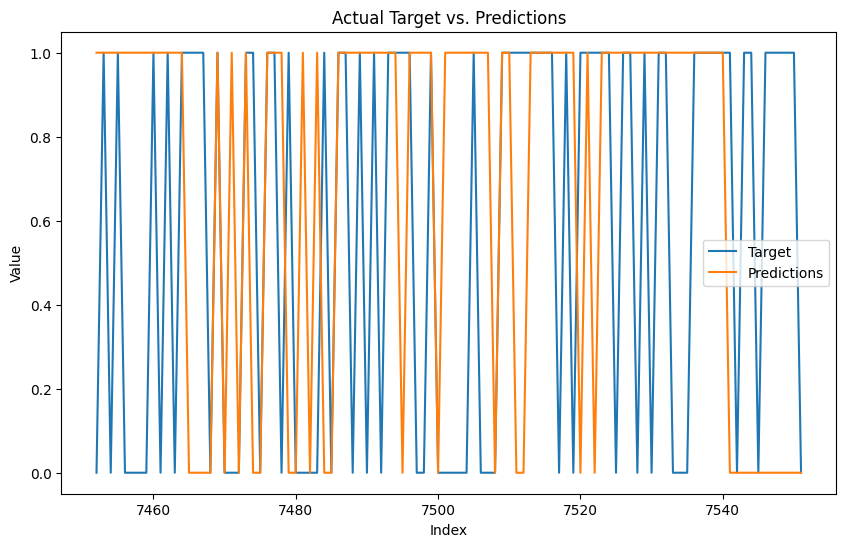

In [ ]:
# Visualizing our predictions accuracy

import matplotlib.pyplot as plt

# Combine the actual target and predictions into one DataFrame
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

# Plot the actual values vs. predictions
combined.plot(figsize=(10, 6), title="Actual Target vs. Predictions")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


In [ ]:
# Backtesting our dataset to increase accuracy

def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into training and testing sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:, 1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > 0.6] = 1
        preds[preds <= 0.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)




In [ ]:
# Apply the backtest function to the data
predictions = backtest(data, model, predictors)

In [ ]:
# Output the predictions
print("Predictions:", predictions)

# Output the number of predictions made
print("Number of predictions made:", len(predictions))


Predictions:       Target  Predictions
1001     0.0          0.0
1002     0.0          0.0
1003     0.0          0.0
1004     1.0          0.0
1005     0.0          1.0
...      ...          ...
7547     1.0          0.0
7548     1.0          0.0
7549     1.0          0.0
7550     1.0          0.0
7551     0.0          0.0

[6551 rows x 2 columns]
Number of predictions made: 6551


In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,5808
1.0,743


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5087483176312247

Our precision score has dropped somewhat significantly, however we made almost 66 as many predictions as last time, perhaps this is closer to the true accuracy we should have expected before backtesting.

Lets add in additional predictors and add in some time based averages as is industry practice in finance. We will also include some basic ratios based on opening and closing prices.

In [ ]:
# Calculate rolling means for different time windows
# Ensure to drop non-numeric columns like 'Date' due to aggregation error
numeric_data = data.select_dtypes(include=[np.number])

weekly_mean = numeric_data.rolling(7).mean()
quarterly_mean = numeric_data.rolling(90).mean()
annual_mean = numeric_data.rolling(365).mean()
weekly_trend = numeric_data.shift(1).rolling(7).mean()["Target"]

# Adding new predictors to the dataset
data["weekly_mean"] = weekly_mean["Actual_Close"] / data["Actual_Close"]
data["quarterly_mean"] = quarterly_mean["Actual_Close"] / data["Actual_Close"]
data["annual_mean"] = annual_mean["Actual_Close"] / data["Actual_Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Actual_Close"]
data["high_close_ratio"] = data["High"] / data["Actual_Close"]
data["low_close_ratio"] = data["Low"] / data["Actual_Close"]

# Update the list of predictors
full_predictors = predictors + [
    "weekly_mean", "quarterly_mean", "annual_mean",
    "annual_weekly_mean", "annual_quarterly_mean",
    "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"
]

# Perform backtesting with the new set of predictors
predictions = backtest(data.iloc[365:], model, full_predictors)

# Evaluate the precision of the predictions
precision = precision_score(predictions["Target"], predictions["Predictions"])
print(f"Precision Score with additional predictors: {precision}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2:.2f}')


Precision Score with additional predictors: 0.9503574265289912
Mean Squared Error: 1342265.48
R-squared: -0.25


We can see that we have increased the performance of our model significantly. I believe this is because of the additional feature engineering we did utilizing the additional averages, and ratios.

In [ ]:
# Output the predictions
print("Predictions:", predictions)

# Output the number of predictions made
print("Number of predictions made:", len(predictions))


Predictions:       Target  Predictions
1366     1.0          0.0
1367     1.0          1.0
1368     1.0          1.0
1369     1.0          1.0
1370     0.0          0.0
...      ...          ...
7547     1.0          1.0
7548     1.0          1.0
7549     1.0          1.0
7550     1.0          1.0
7551     0.0          0.0

[6186 rows x 2 columns]
Number of predictions made: 6186


In [ ]:
# Show how many trades we would make

predictions["Predictions"].value_counts()

,count
Predictions,
0.0,3668
1.0,2518
